# Import libraries 

In [1]:
# libraries for data handling
import numpy as np
import pandas as pd

#libraries for data visualisation 
import matplotlib.pyplot as plt
import seaborn as sns

# set visualisation
%matplotlib inline
sns.set_style("whitegrid")

Source of data: https://www.kaggle.com/vipulgote4/reading-habit-dataset

In [2]:
#import data
df = pd.read_csv("Reading habit.csv")
df.head()

,Age,Sex,Race,Marital status?,Education,Employement,Incomes,How many books did you read during last 12months?,Read any printed books during last 12months?,Read any audiobooks during last 12months?,Read any e-books during last 12months?,"Last book you read, you…",Do you happen to read any daily news or newspapers?,Do you happen to read any magazines or journals?
0,66,Male,Refused,Divorced,College graduate,Retired,"$20,000 to under $30,000",97,Yes,No,Yes,Purchased the book,No,Yes
1,46,Male,Native American/American Indian,Married,High school graduate,Employed full-time,"Less than $10,000",97,Yes,Yes,Yes,Purchased the book,Yes,Yes
2,32,Male,Mixed race,Never been married,High school graduate,Employed full-time,"Less than $10,000",97,No,Yes,Yes,Borrowed the book from a friend or family member,Yes,Yes
3,27,Male,Mixed race,Married,High school graduate,Employed full-time,"$40,000 to under $50,000",97,Yes,No,Yes,Borrowed the book from a library,Yes,No
4,16,Female,Mixed race,Never been married,High school incomplete,Employed part-time,"$10,000 to under $20,000",97,Yes,Yes,No,Purchased the book,Yes,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2832 entries, 0 to 2831
Data columns (total 14 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   Age                                                  2832 non-null   int64 
 1   Sex                                                  2832 non-null   object
 2   Race                                                 2832 non-null   object
 3   Marital status?                                      2832 non-null   object
 4   Education                                            2832 non-null   object
 5   Employement                                          2832 non-null   object
 6   Incomes                                              2832 non-null   object
 7   How many books did you read during last 12months?    2832 non-null   int64 
 8   Read any printed books during last 12months?         2442 non-null   object
 9

# Age

In [4]:
# understanding the age variable
print("Age description")
df["Age"].describe()

Age description


count    2832.000000
mean       47.276483
std        18.565516
min        16.000000
25%        32.000000
50%        48.000000
75%        62.000000
max        93.000000
Name: Age, dtype: float64

<Figure size 1440x576 with 0 Axes>

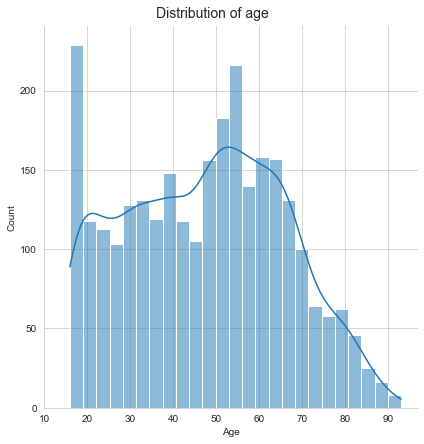

In [5]:
# graphical representation of age variable
plt.figure(figsize=(20,8))
sns.displot(x= "Age", data = df, bins= 25, kde = True, height = 6)
plt.xlim(10,)
plt.suptitle("Distribution of age", y=1.02, fontsize = 14)

plt.show()

<Figure size 1440x576 with 0 Axes>

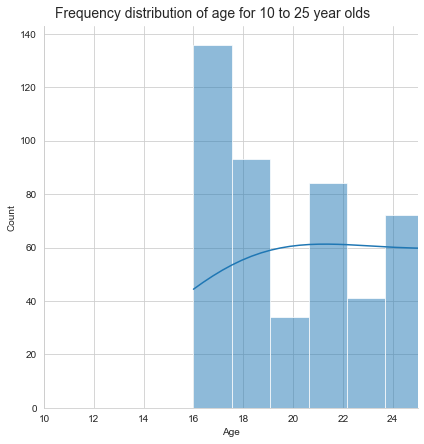

In [6]:
# graphical representation of age variable zooming into age 10 to 25
plt.figure(figsize=(20,8))
sns.displot(x= "Age", data = df, bins= 50, kde = True, height = 6)
plt.xlim(10,25)
plt.suptitle("Frequency distribution of age for 10 to 25 year olds", y=1.02, fontsize = 14)
plt.show()

In [7]:
# no. of responses who are 16 years old
print(sum(df["Age"]== 16), "responded as being 16 years old")
print( "This is", round((sum(df["Age"]== 16)/df.shape[0])*100,2), "% of the dataset.")

68 responded as being 16 years old
This is 2.4 % of the dataset.


# Sex

In [8]:
# understanding the age variable
print("Sex description")
df["Sex"].value_counts()

Sex description


Female    1479
Male      1353
Name: Sex, dtype: int64

In [9]:
print( round((df[df["Sex"]=="Female"].shape[0]/df.shape[0])*100,2), "% of participants are female")

52.22 % of participants are female


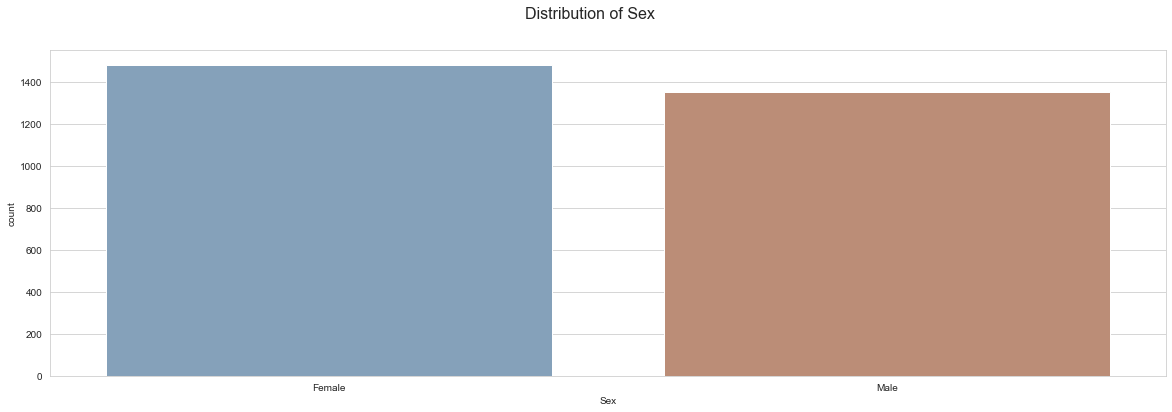

In [10]:
# graphical representation of Sex variable
plt.figure(figsize=(20,6))
sns.countplot(x= "Sex", data = df, palette = "twilight_shifted", order= df["Sex"].value_counts().index)
plt.suptitle("Distribution of Sex", fontsize = 16)
plt.show()

# Race

In [11]:
# understanding the Race variable
print("Race description")
df["Race"].value_counts()

Race description


White                              2217
Black or African-American           347
Asian or Pacific Islander            70
Mixed race                           63
Other                                58
Refused                              37
Native American/American Indian      31
Don’t know                            9
Name: Race, dtype: int64

In [12]:
# no. of responses who where white
print( round((sum(df["Race"]=="White")/df.shape[0])*100,2), "% of participants identified as white")

78.28 % of participants identified as white


In [13]:
# reset "Don’t know","Refused" to null
df["Race"].replace(("Don’t know","Refused"), np.NaN, inplace = True)

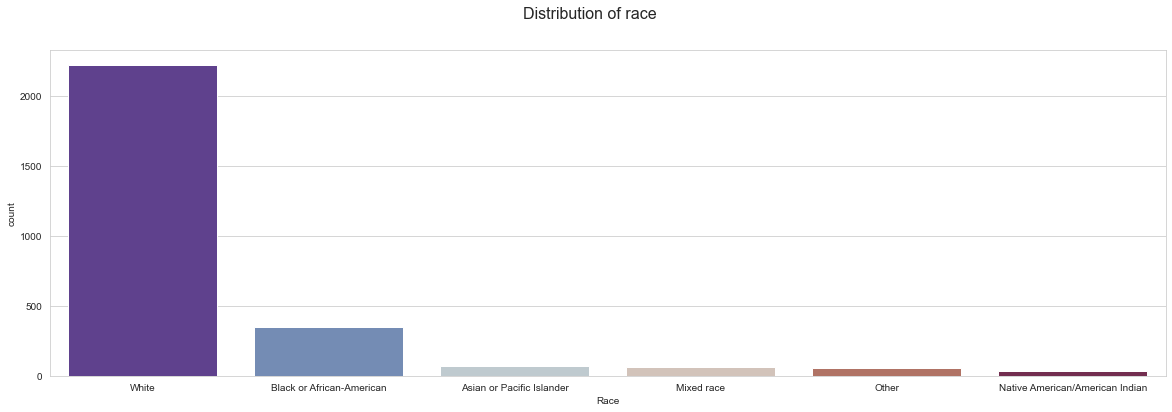

In [14]:
# graphical representation of Race variable
plt.figure(figsize=(20,6))
sns.countplot(x= "Race", data = df, palette = "twilight_shifted", order= df["Race"].value_counts().index)
plt.suptitle("Distribution of race", fontsize = 16)
plt.show()

# Marital status

In [15]:
# revise column name
df["Marital status"] = df["Marital status?"]
df.drop("Marital status?", axis = 1, inplace = True)

In [16]:
# understanding the Marital status variable
print("Marital status description")
df['Marital status'].value_counts()

Marital status description


Married                  1532
Never been married        592
Divorced                  245
Widowed                   191
Living with a partner     141
Single                     60
Separated                  54
Don’t know                 17
Name: Marital status, dtype: int64

In [17]:
# no. of "don't know" responses
print(round((sum(df["Marital status"] == "Don’t know")/df.shape[0])*100,2), "% of responses were \"Don't know\"" )

0.6 % of responses were "Don't know"


In [18]:
# reset "Don’t know","Refused" to null
df["Marital status"].replace("Don’t know", np.NaN, inplace = True)

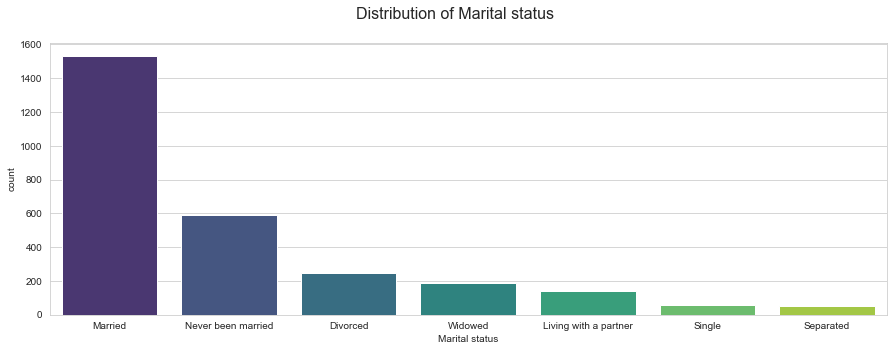

In [19]:
# graphical representation of Marital status variable
plt.figure(figsize = (15,5))
sns.countplot(x = "Marital status" , data = df, order = df["Marital status"].value_counts().index, palette = "viridis")
plt.suptitle("Distribution of Marital status", fontsize = 16)
plt.show()

# Education

In [20]:
# understanding the Education variable
print("Education description")
df["Education"].value_counts()

Education description


High school graduate                                        688
Some college, no 4-year degree                              651
College graduate                                            597
Post-graduate training/professional school after college    501
High school incomplete                                      263
Technical, trade or vocational school AFTER high school      66
None                                                         58
Don’t know                                                    8
Name: Education, dtype: int64

In [21]:
# no. of "Education" responses
print( round((df[df["Education"]=="None"].shape[0]/df["Education"].shape[0])*100,2), "% of responses were \"None\"")

2.05 % of responses were "None"


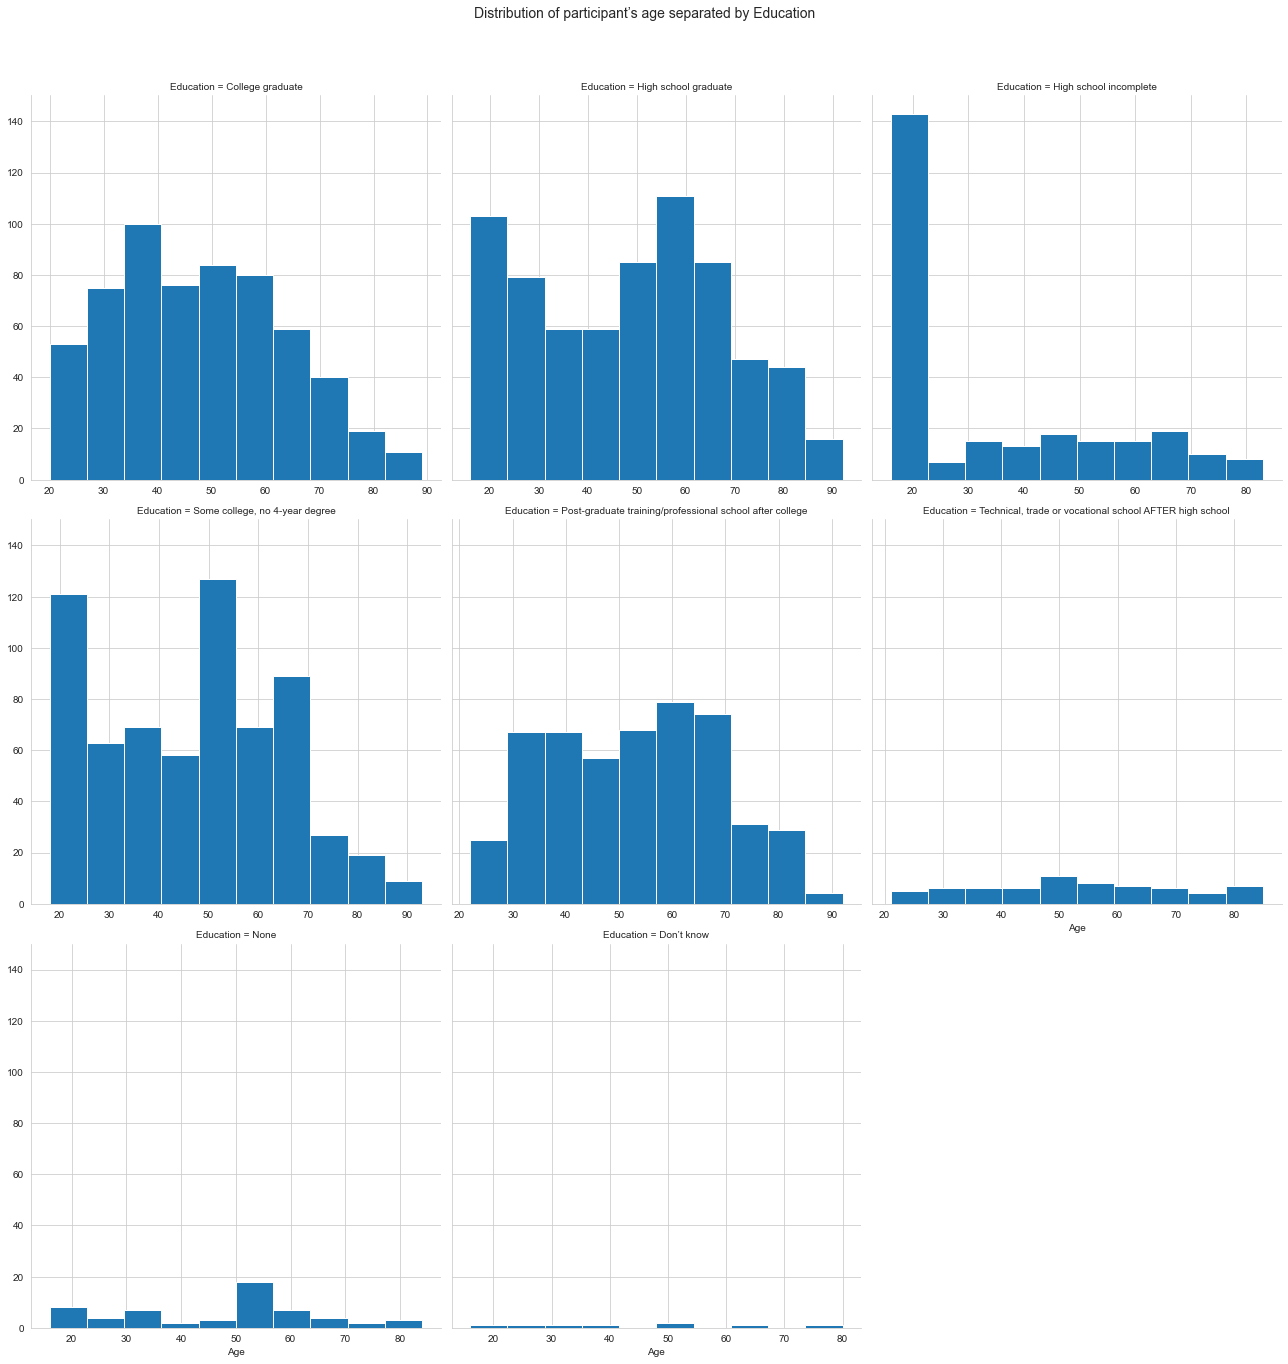

In [22]:
# graphical representation of Education variable in relation to Age
g = sns.FacetGrid(df, col = "Education", sharex=False, col_wrap = 3,height = 6)
g.map(plt.hist, "Age")
plt.suptitle("Distribution of participant’s age separated by Education", y=1.05, fontsize = 14)
plt.show()

In [23]:
# update education responses
df["Education"].replace(("None", "Don’t know"), np.NaN, inplace = True)
df["Education"].replace("Technical, trade or vocational school AFTER high school", "Technical School", inplace = True)
df["Education"].replace("Post-graduate training/professional school after college", "Post-graduate ", inplace = True)
df["Education"].replace("Some college, no 4-year degree", "In College", inplace = True)

# revised Education variable
print("Education description  (Updated)")
df["Education"].value_counts()

Education description  (Updated)


High school graduate      688
In College                651
College graduate          597
Post-graduate             501
High school incomplete    263
Technical School           66
Name: Education, dtype: int64

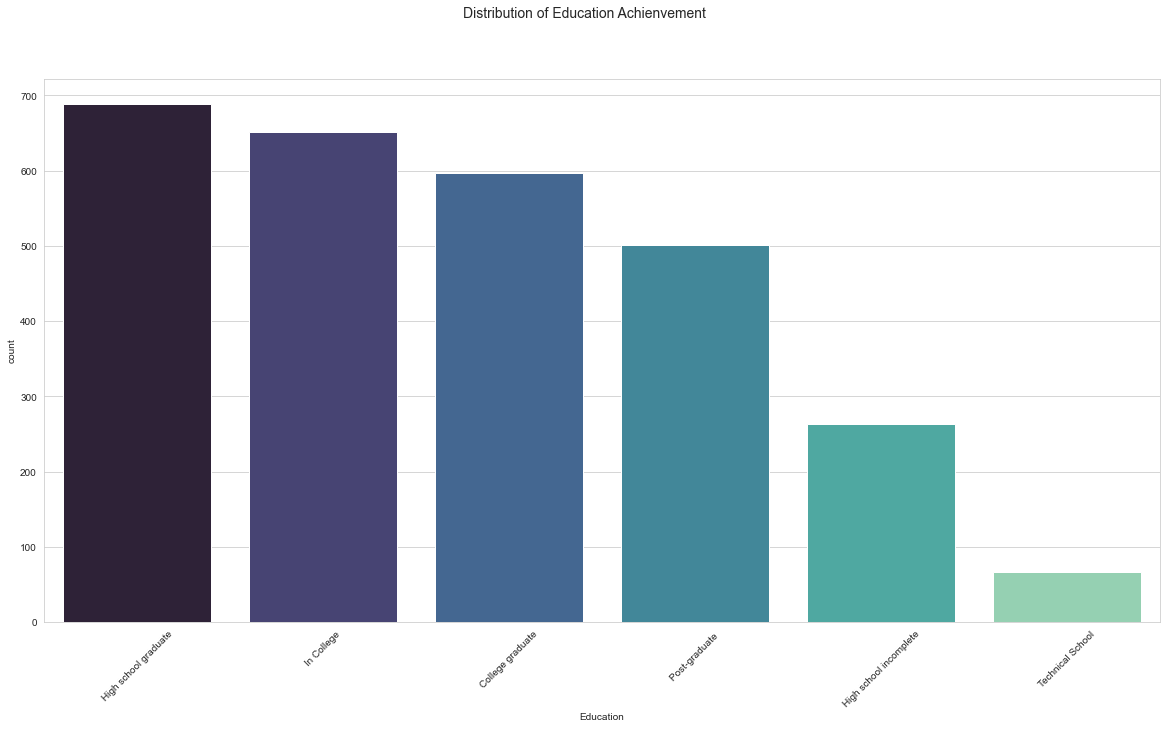

In [24]:
#graphical representation of Education variable
plt.figure(figsize = (20,10))
sns.countplot(x = "Education", data = df, order = df["Education"].value_counts().index, palette = "mako")
plt.xticks(rotation=45)
plt.suptitle("Distribution of Education Achienvement", fontsize = 14)
plt.show()

# Employement

In [25]:
# understanding the Employement variable
print("Employement description")
df["Employement"].value_counts()

Employement description


Employed full-time                 1238
Retired                             605
Not employed for pay                474
Employed part-time                  355
Disabled                             70
Have own business/self-employed      53
Student                              22
Other                                15
Name: Employement, dtype: int64

In [26]:
# update "other" responses to null
df["Employement"].replace("Other", np.NaN, inplace = True)

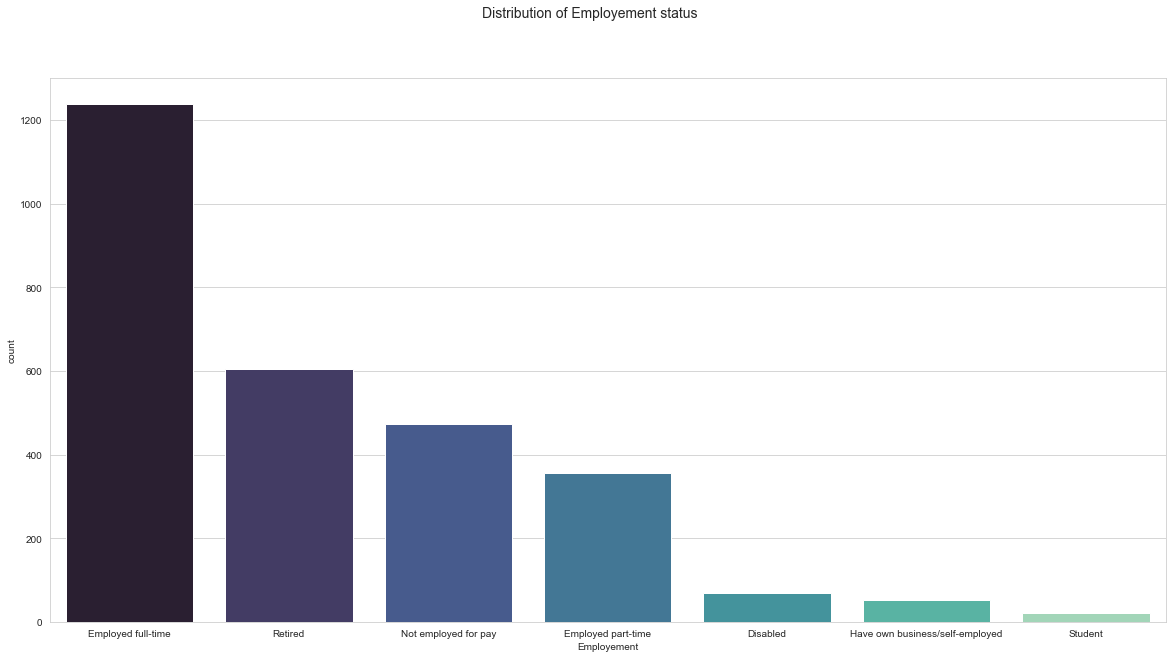

In [27]:
#graphical representation of Employement variable
plt.figure(figsize = (20,10))
sns.countplot(x = "Employement", data = df, order = df["Employement"].value_counts().index, palette = "mako")
plt.suptitle("Distribution of Employement status", fontsize = 14)
plt.show()

# Incomes

In [28]:
# understanding the Incomes variable
print("Incomes description")
df["Incomes"].value_counts()

Incomes description


$100,000 to under $150,000     530
$50,000 to under $75,000       394
$75,000 to under $100,000      316
Refused                        291
$30,000 to under $40,000       265
$20,000 to under $30,000       238
$10,000 to under $20,000       216
9$100,000 to under $150,000    212
$40,000 to under $50,000       207
Less than $10,000              163
Name: Incomes, dtype: int64

In [29]:
# update education responses
df["Incomes"].replace("$100,000 to under $150,000", "100 - 150", inplace = True)
df["Incomes"].replace("$50,000 to under $75,000", '50 - 75', inplace = True)
df["Incomes"].replace("$75,000 to under $100,000", '75 - 100', inplace = True)
df["Incomes"].replace("Refused", np.NaN, inplace = True)

df["Incomes"].replace("$30,000 to under $40,000", "30 - 40", inplace = True)
df["Incomes"].replace("$20,000 to under $30,000", "20 - 30", inplace = True)
df["Incomes"].replace("$10,000 to under $20,000", "10 - 20", inplace = True)
df["Incomes"].replace("9$100,000 to under $150,000", "100 - 150", inplace = True)
df["Incomes"].replace("$40,000 to under $50,000", "40 - 50", inplace = True)
df["Incomes"].replace("Less than $10,000", "<10", inplace = True)

#revise column name
df["Incomes in 1000s (USD)"] = df["Incomes"] 
df.drop("Incomes", axis = 1, inplace = True)

In [30]:
# updated income variable
df["Incomes in 1000s (USD)"].value_counts()

100 - 150    742
50 - 75      394
75 - 100     316
30 - 40      265
20 - 30      238
10 - 20      216
40 - 50      207
<10          163
Name: Incomes in 1000s (USD), dtype: int64

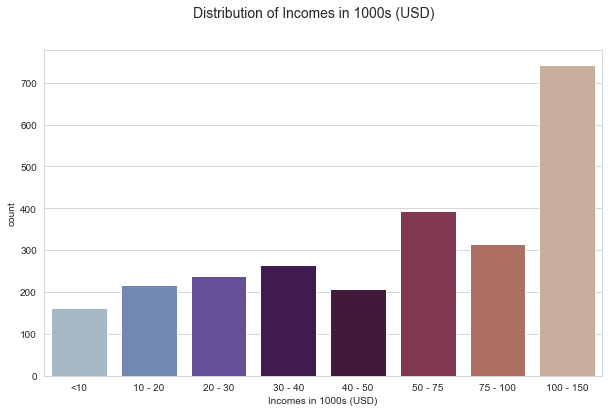

In [31]:
# graphical representation of Incomes in 1000s (USD) variable
plt.figure(figsize = (10,6))
sns.countplot(x = "Incomes in 1000s (USD)", data = df, order = ["<10", "10 - 20", "20 - 30",
                                                       "30 - 40","40 - 50","50 - 75",
                                                       "75 - 100", "100 - 150" ], palette = "twilight")


plt.suptitle("Distribution of Incomes in 1000s (USD)", fontsize = 14)
plt.show()

# No. of books read in the last 12 months


In [32]:
# update column name
df["No. of books read in last 12months"] = df["How many books did you read during last 12months?"] 
df.drop("How many books did you read during last 12months?", axis = 1, inplace = True)

In [33]:
# understanding the No. of books read in the last 12months variable
print("No. of books read in the last 12months")
df["No. of books read in last 12months"].value_counts( ascending= False).head()

No. of books read in the last 12months


0    390
3    209
6    172
2    169
5    167
Name: No. of books read in last 12months, dtype: int64

In [34]:
# understanding the distribution of No. of books read in the last 12months
print("No. of books read in last 12months description")
df["No. of books read in last 12months"].describe()

No. of books read in last 12months description


count    2832.000000
mean       16.676201
std        23.632071
min         0.000000
25%         2.750000
50%         6.000000
75%        20.000000
max        97.000000
Name: No. of books read in last 12months, dtype: float64

In [35]:
# reading less than 5 books
print( round((df[df["No. of books read in last 12months"]<5].shape[0]/df.shape[0])*100,2), "% of responses read less than 5 books over the last 12months")

38.24 % of responses read less than 5 books over the last 12months


<Figure size 1440x720 with 0 Axes>

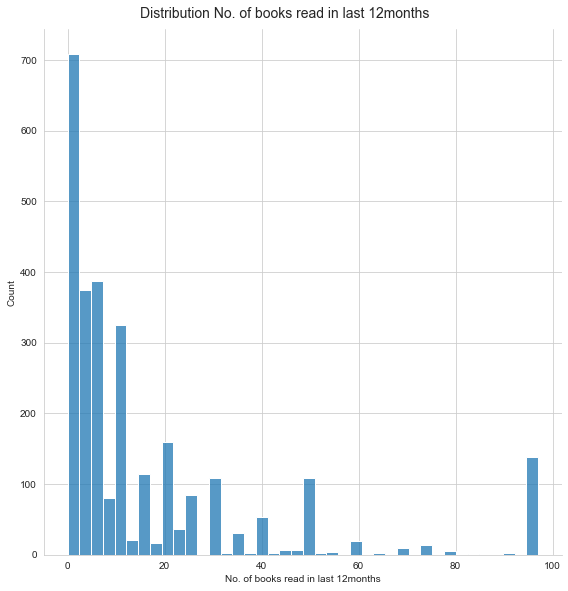

In [36]:
#graphical representation of No. of books read in the last 12months variable
plt.figure(figsize = (20,10))
sns.displot( x = "No. of books read in last 12months", data = df, height = 8,)
plt.suptitle("Distribution No. of books read in last 12months", y = 1.02, fontsize = 14)
plt.show()

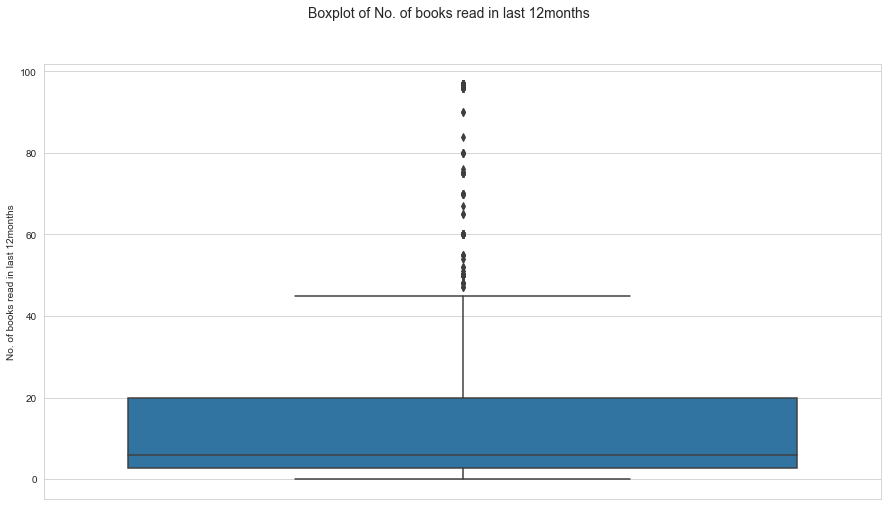

In [37]:
# box plot of No. of books read in the last 12months - understanding outliers
plt.figure(figsize = (15,8))
sns.boxplot(y= "No. of books read in last 12months", data = df)
plt.suptitle("Boxplot of No. of books read in last 12months", fontsize = 14)
plt.show()

# Printed books read in the last 12 months 

In [38]:
# rename column 
df["Printed books in the last 12months"] = df["Read any printed books during last 12months?"] 
df.drop("Read any printed books during last 12months?", axis = 1, inplace = True)

In [39]:
# understanding the Printed books in the last 12months variable
print("Printed books in the last 12months description")
df["Printed books in the last 12months"].value_counts()

Printed books in the last 12months description


Yes           2264
No             168
Don’t know      10
Name: Printed books in the last 12months, dtype: int64

In [40]:
# set "don't know" to null
df["Printed books in the last 12months"].replace("Don’t know", np.NaN, inplace= True)

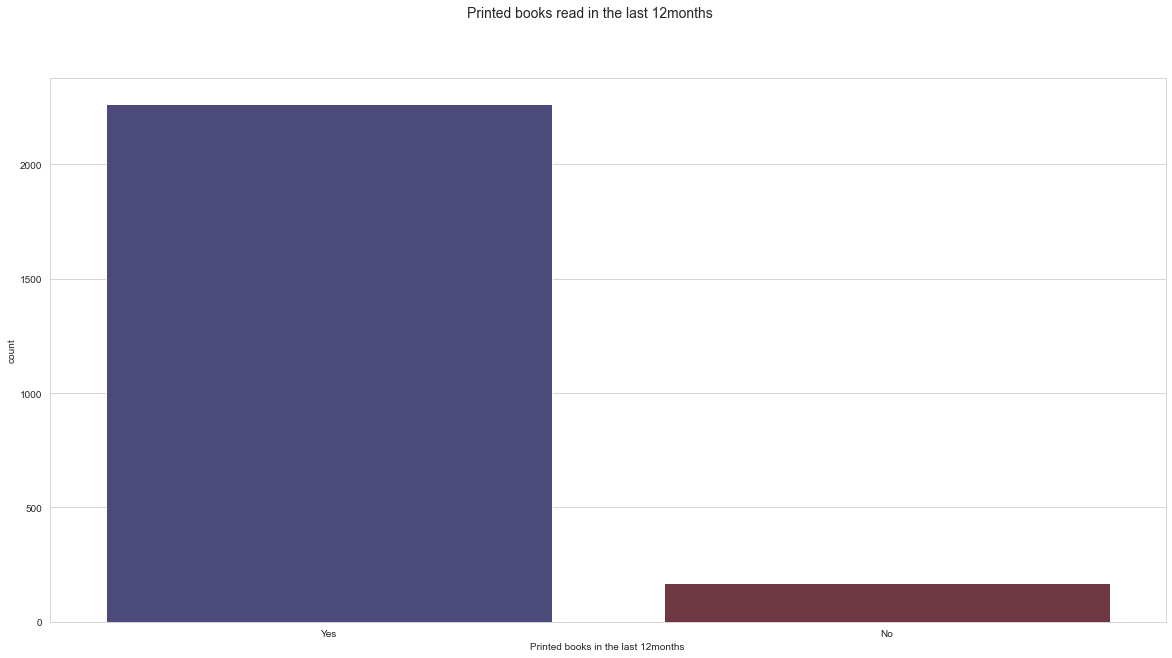

In [41]:
#graphical representation of Printed books in the last 12months variable
plt.figure(figsize = (20,10))
sns.countplot(x= "Printed books in the last 12months", data = df, palette = "icefire", order = ["Yes", "No"])

plt.suptitle("Printed books read in the last 12months", fontsize = 14)
plt.show()

# Audio and E-Books 

## Audio books

In [42]:
# rename columns
df["Audiobooks in last 12months"] = df["Read any audiobooks during last 12months?"] 
df.drop("Read any audiobooks during last 12months?", axis = 1, inplace = True)

In [43]:
# understanding the Audiobooks in last 12months variable
print("Audiobooks in last 12months description")
df["Audiobooks in last 12months"].value_counts()

Audiobooks in last 12months description


No            2027
Yes            411
Don’t know       4
Name: Audiobooks in last 12months, dtype: int64

In [44]:
# set "don't know" to audiobooks
df["Audiobooks in last 12months"].replace("Don’t know", np.NaN, inplace = True)

In [45]:
# seperate dataset to those who had read a book in the past 12 months
readers = df[df["No. of books read in last 12months"]>0]


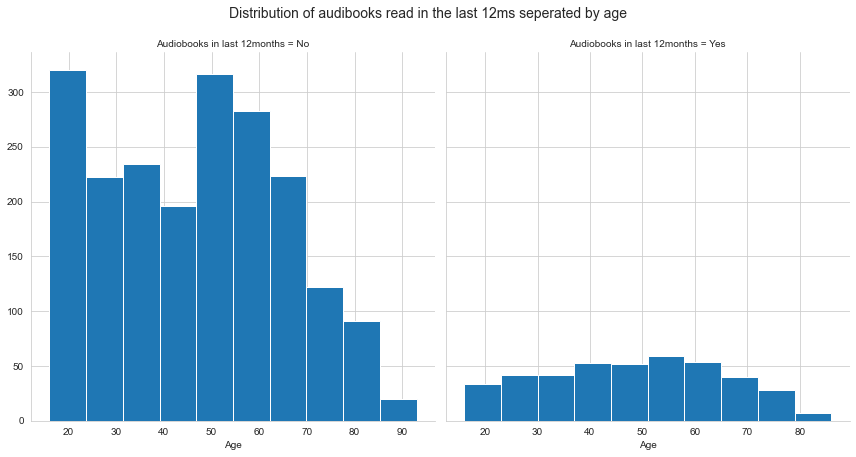

In [46]:
#graphical representation of Audiobooks in last 12months variable amoungst readers
g = sns.FacetGrid(readers, col = "Audiobooks in last 12months", sharex=False,height = 6)
g.map(plt.hist, "Age")
plt.suptitle("Distribution of audibooks read in the last 12ms seperated by age", y=1.05, fontsize = 14)
plt.show()

## E-books

In [47]:
# rename columns
df["E-Books during last 12months"] = df["Read any e-books during last 12months?"] 
df.drop("Read any e-books during last 12months?", axis = 1, inplace = True)

In [48]:
# understanding the E-Books during last 12months variable
print("E-Books during last 12months description")
df["E-Books during last 12months"].value_counts()

E-Books during last 12months description


No            1641
Yes            787
Don’t know      14
Name: E-Books during last 12months, dtype: int64

In [49]:
# reset "don't know" responses to null
df["E-Books during last 12months"].replace("Don’t know", np.NaN, inplace = True)

# Method of obtaining previous book

In [50]:
# rename column name
df["Method of obtaining previous book"] = df["Last book you read, you…"] 
df.drop("Last book you read, you…", axis = 1, inplace = True)

In [51]:
# understanding the Method of obtaining previous book variable
print("Method of obtaining previous book description")
df["Method of obtaining previous book"].value_counts()

Method of obtaining previous book description


Purchased the book                                  1266
Borrowed the book from a friend or family member     501
Borrowed the book from a library                     335
Got the book some other way                          309
8                                                     25
9                                                      6
Name: Method of obtaining previous book, dtype: int64

In [52]:
# update/clean responses
df["Method of obtaining previous book"].replace(["8","9"], np.NaN, inplace = True)
df["Method of obtaining previous book"].replace("Borrowed the book from a friend or family member", "Borrowed from Friend/family", inplace = True)
df["Method of obtaining previous book"].replace("Got the book some other way", "Other", inplace = True)

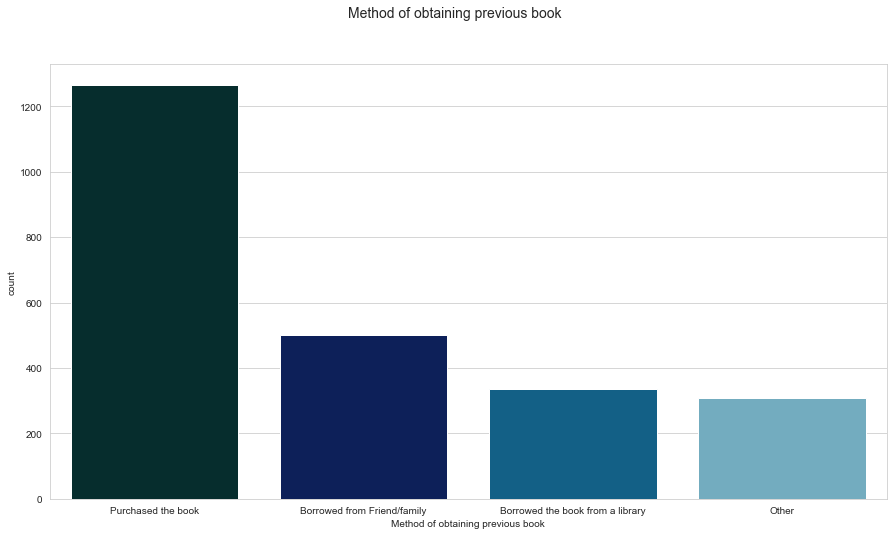

In [53]:
#graphical representation of Method of obtaining previous book variable
plt.figure(figsize = (15,8))
sns.countplot(x= "Method of obtaining previous book", data = df, palette = "ocean")
plt.suptitle("Method of obtaining previous book", fontsize = 14)
plt.show()

# Daily newspapers & Magazines 

## Daily Newspapers

In [54]:
# update column name
df["Daily news or newspapers"] = df["Do you happen to read any daily news or newspapers?"] 
df.drop("Do you happen to read any daily news or newspapers?", axis = 1, inplace = True)

In [55]:
# understanding the Daily news or newspapers variable
print("Daily news or newspapers description")
df["Daily news or newspapers"].value_counts()

Daily news or newspapers description


Yes           1750
No            1077
Don’t know       5
Name: Daily news or newspapers, dtype: int64

In [56]:
# revise "don't know" to null
df["Daily news or newspapers"].replace("Don’t know", np.NaN, inplace = True)

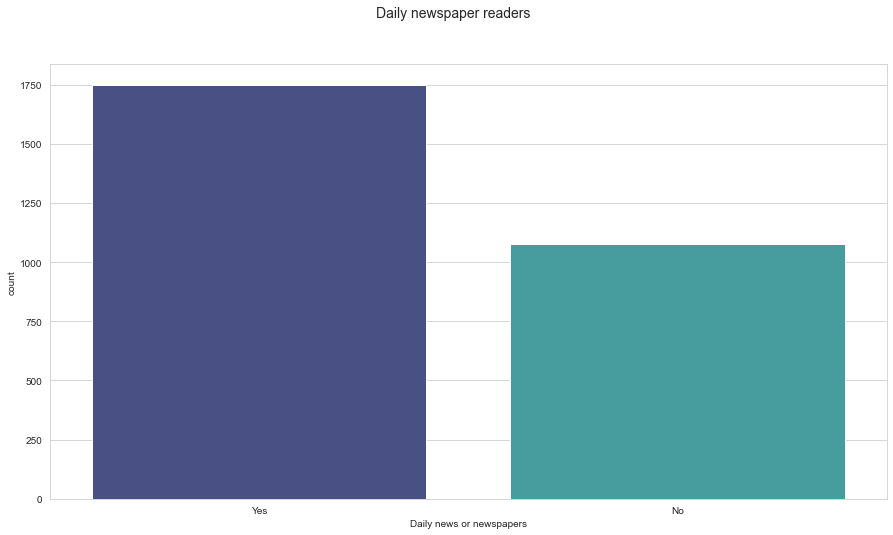

In [57]:
#graphical representation of Daily news or newspaper variable
plt.figure(figsize = (15,8))
sns.countplot(x = "Daily news or newspapers", data = df, palette = "mako", order = ["Yes", "No"])
plt.suptitle("Daily newspaper readers ", fontsize = 14)
plt.show()

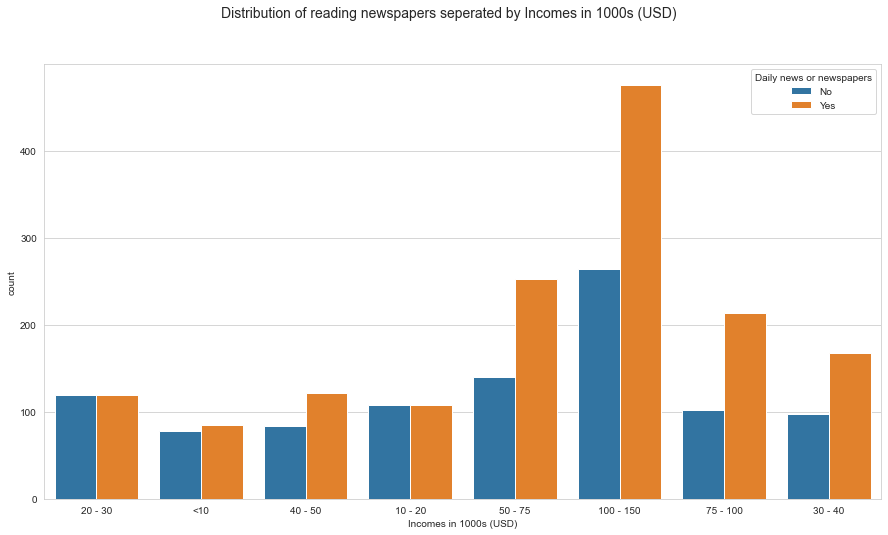

In [58]:
#graphical representation of Daily news or newspaper variable, seperated by Incomes in 1000s (USD)
plt.figure(figsize = (15,8))
sns.countplot(x = "Incomes in 1000s (USD)", data = df, hue = "Daily news or newspapers")
plt.suptitle("Distribution of reading newspapers seperated by Incomes in 1000s (USD)", fontsize = 14)
plt.show()

## Magazines or Journals 

In [59]:
# update column names 
df["Magazines or Journals"] = df["Do you happen to read any magazines or journals?"] 
df.drop("Do you happen to read any magazines or journals?", axis = 1, inplace = True)

In [60]:
# understanding the Magazines or Journals variable
print("Magazines or Journals description")
df["Magazines or Journals"].value_counts()

Magazines or Journals description


Yes           1506
No            1322
Don’t know       4
Name: Magazines or Journals, dtype: int64

In [61]:
# revise "don't know" to null
df["Magazines or Journals"].replace("Don’t know", np.NaN, inplace = True)

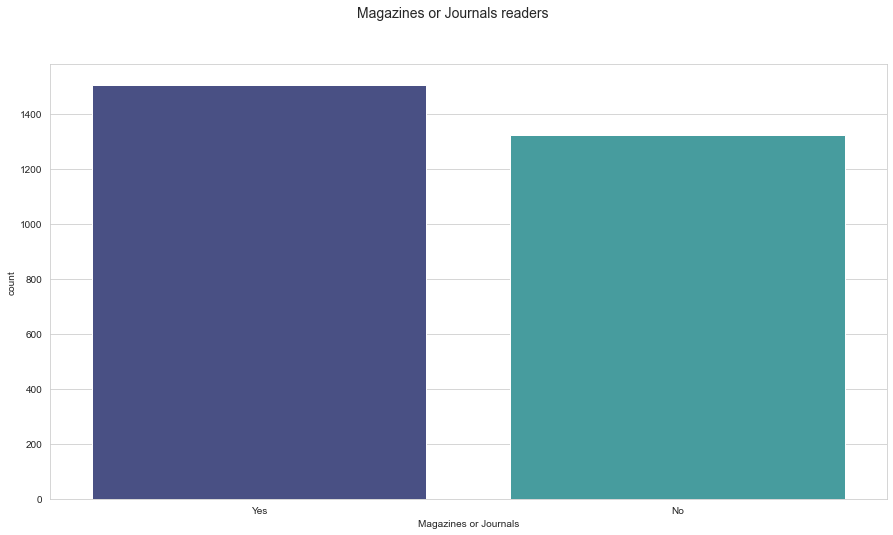

In [62]:
#graphical representation of Magazines or Journals variable
plt.figure(figsize = (15,8))
sns.countplot(x = "Magazines or Journals", data = df, palette = "mako", order = ["Yes", "No"])
plt.suptitle("Magazines or Journals readers ", fontsize = 14)
plt.show()

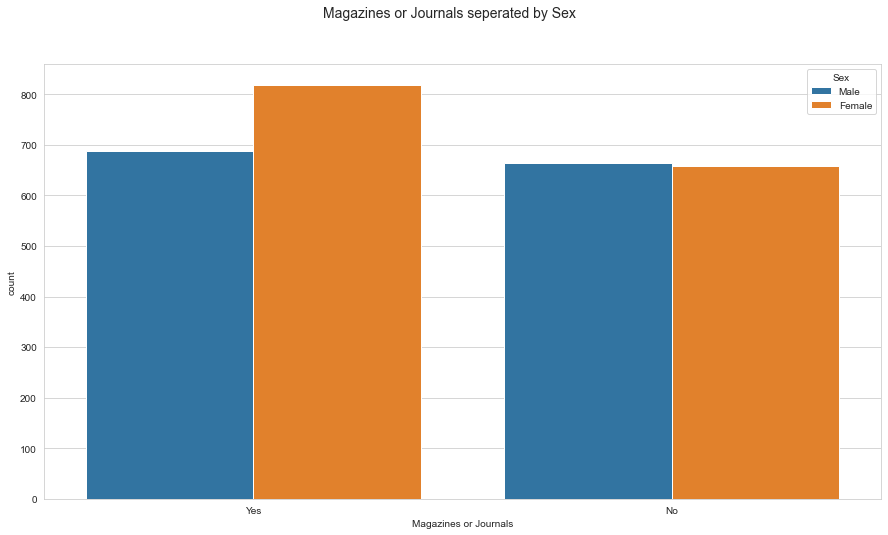

In [63]:
#graphical representation of Magazines or Journals variable seperated by Sex
plt.figure(figsize = (15,8))
sns.countplot(x = "Magazines or Journals", data = df, hue = "Sex")
plt.suptitle("Magazines or Journals seperated by Sex", fontsize = 14)
plt.show()

# Null values

In [64]:
# updated dataset amd null values
print("No of null values")
df.isna().sum()

No of null values


Age                                     0
Sex                                     0
Race                                   46
Education                              66
Employement                            15
Marital status                         17
Incomes in 1000s (USD)                291
No. of books read in last 12months      0
Printed books in the last 12months    400
Audiobooks in last 12months           394
E-Books during last 12months          404
Method of obtaining previous book     421
Daily news or newspapers                5
Magazines or Journals                   4
dtype: int64